#### Import packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### New instance data

In [2]:
new_data = pd.DataFrame({'Age': [37], # 15<=value<=75
                         'anonymity': ['Yes'], # 'Missing', 'No', 'Unknown', 'Yes'
                         'benefits': ['Yes'], # 'Missing', 'No', 'Unknown', 'Yes'
                         'care_options': ['Unknown'], # 'Missing', 'No', 'Unknown', 'Yes'
                         'coworkers': ['Yes'], # 'Maybe', 'Missing', 'No', 'Yes'
                         'family_history': ['No'], # 'No', 'Unknown', 'Yes'
                         'Gender': ['Female'], # 'Female', 'Homosexual', 'Male', 'Missing'
                         'leave': ['Easy'], # 'Difficult', 'Easy', 'Missing', 'Unknown'
                         'mental_health_consequence': ['No'], # 'Maybe', 'Missing', 'No', 'Yes'
                         'mental_health_interview': ['No'], # 'Maybe', 'No', 'Yes'
                         'mental_vs_physical': ['Yes'], # 'Missing', 'No', 'Unknown', 'Yes'
                         'no_employees': ['1-25'], # '1-25', '100-1000', '26-100', 'Missing', 'More than 1000'
                         'obs_consequence': ['No'], # 'Missing', 'No', 'Yes'
                         'phys_health_consequence': ['No'], # 'Maybe', 'Missing', 'No', 'Yes'
                         'phys_health_interview': ['Maybe'], # 'Maybe', 'No', 'Yes'
                         'remote_work': ['No'], # 'No', 'Yes'
                         'seek_help': ['Yes'], # 'Missing', 'No', 'Unknown', 'Yes'
                         'self_employed': ['Missing'], # 'Missing', 'No', 'Yes'
                         'supervisor': ['Yes'], # 'Maybe', 'Missing', 'No', 'Yes'
                         'tech_company': ['Yes'], # 'Missing', 'No', 'Yes'
                         'wellness_program': ['No'], # 'Missing', 'No', 'Unknown', 'Yes'
                         'work_interfere': ['Yes'] # 'Missing', 'No', 'Unknown', 'Yes'
                        })

#### Preprocessing of new instance data
- Missing values
- Convert categorical features to category type
- Normalization of numerical features
- One hot encoding of categorical features

*Note*: We are just replicating the preprocessing done in the original survey data in notebook *1. Preprocessing.ipynb*.

In [3]:
new_data_raw = new_data.copy()
missings,normalization,one_hot_encoding = pickle.load(open('Data/preprocessing_dictionaries.dat','rb'))
for feature in new_data.columns:
    if new_data[feature].dtypes in ['int','int32','int64','float','float32','float64']:
        new_data[feature] = new_data[feature].replace(np.nan,missings[feature])
        mean = normalization[feature][0]
        std = normalization[feature][1]
        new_data[feature] = new_data[feature].apply(lambda x: (x-mean)/(std))
    else:
        new_data[feature] = new_data[feature].replace(np.nan,missings[feature])
        new_data[feature] = new_data[feature].astype('category')
        for level in one_hot_encoding[feature]:
            new_data[feature+'_'+level] = (new_data[feature]==level).astype('int')
        new_data = new_data.drop(columns=feature)

In [4]:
new_data.T

,0
Age,0.49662
anonymity_Missing,0.00000
anonymity_No,0.00000
anonymity_Unknown,0.00000
anonymity_Yes,1.00000
benefits_Missing,0.00000
benefits_No,0.00000
benefits_Unknown,0.00000
benefits_Yes,1.00000
care_options_Missing,0.00000


#### Prediction of 1st stacking layer models

In [5]:
models = {}
for model in ['LR','RF','KNN','ET','XGB','LGBM','DT','AB']:
    models[model] = pickle.load(open('Data/model_layer1_'+model+'.dat','rb'))
    new_data_raw['prediction_'+model] = models[model].predict_proba(new_data)[:,1]

#### Prediction of metalearner or 2nd stacking layer model

In [6]:
columns_predictions = ['prediction_'+model for model in models.keys()]
metalearner = pickle.load(open('Data/model_layer2_metalearner.dat','rb'))
new_data_raw['prediction_metalearner'] = metalearner.predict_proba(new_data_raw[columns_predictions])[:,1]

In [7]:
new_data_raw.T

,0
Age,37
anonymity,Yes
benefits,Yes
care_options,Unknown
coworkers,Yes
family_history,No
Gender,Female
leave,Easy
mental_health_consequence,No
mental_health_interview,No


#### Distribution of new instance prediction

Let's see the distribution of predictions for the new instance in 1st stacking layer in relation to the final prediction in 2nd stacking layer model or metalearner.

*Note*: We use the final prediction in 2nd stacking layer model as center of intervals of confidence 90%, understanding that it is the most accurated punctual estimation.

In [8]:
InteractiveShell.ast_node_interactivity = 'none'

Your predictions in the 1st stacking layer models are:
 prediction_AB      0.522157
prediction_XGB     0.694172
prediction_LGBM    0.696023
prediction_ET      0.705698
prediction_LR      0.735072
prediction_RF      0.786344
prediction_KNN     0.798119
prediction_DT             1
Name: 0, dtype: object

Your final prediction in the 2nd stacking layer is:
 0.8038307053429642

The standard deviation of your predictions in the 1st stacking layer is:
 0.1253881607408141


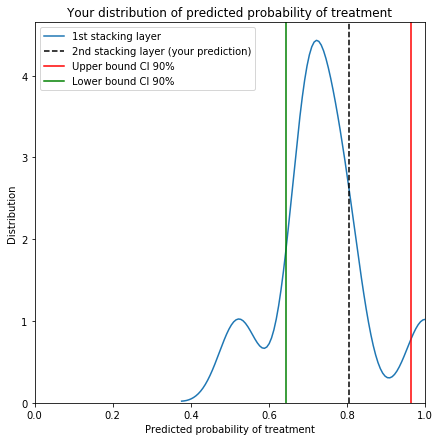

In [9]:
predictions_1st_stacking_layer = new_data_raw.loc[0,columns_predictions]
print('Your predictions in the 1st stacking layer models are:\n',predictions_1st_stacking_layer[np.argsort(predictions_1st_stacking_layer)])

prediction_2nd_stacking_layer = new_data_raw.loc[0,'prediction_metalearner']
print('\nYour final prediction in the 2nd stacking layer is:\n',prediction_2nd_stacking_layer)

std = np.std(predictions_1st_stacking_layer)
print('\nThe standard deviation of your predictions in the 1st stacking layer is:\n',std)

fig = plt.figure(figsize=(7,7))
fig = sns.kdeplot(predictions_1st_stacking_layer,label='1st stacking layer')
plt.axvline(x=new_data_raw.loc[0,'prediction_metalearner'],color='black',linestyle='--',label='2nd stacking layer (your prediction)')
z_value = scipy.stats.norm.ppf(0.90)
plt.axvline(prediction_2nd_stacking_layer+z_value*std,c='red',label='Upper bound CI 90%')
plt.axvline(prediction_2nd_stacking_layer-z_value*std,c='green',label='Lower bound CI 90%')
plt.xlim(0,1)
plt.xlabel('Predicted probability of treatment')
plt.ylabel('Distribution')
plt.title('Your distribution of predicted probability of treatment')
plt.legend()

*Note:* We can compare this interval of confidence with a baseline like the confidence interval for the prediction with the Logistic regression in 1st stacking layer, and if it is smaller we are getting a more accurated interval of confidence for the prediction of the new instance.

#### Understanding the prediction of new instance feature by feature

Let's plot the distribution of predictions by feature values using the preditions of all original survey data used for creating the whole stacking model.

*Note*: We need to load the preprocessed data file before normalization and one hot encoding with 1st and 2nd stacking layer predictions.

In [10]:
data = pickle.load(open('Data/data.dat','rb'))[0]
data.T

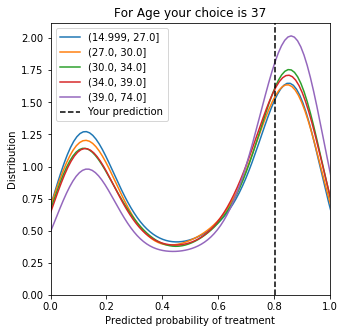

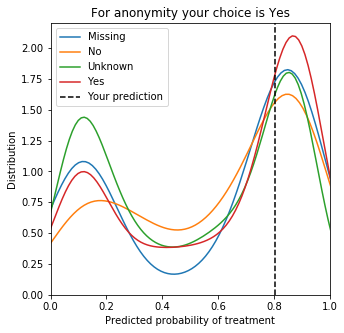

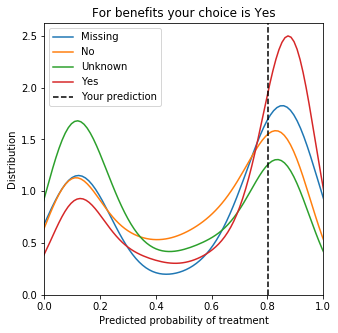

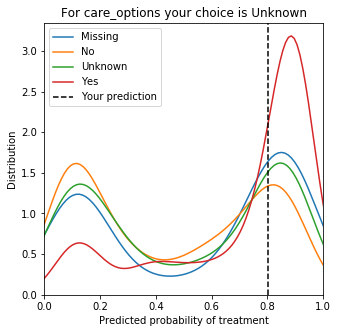

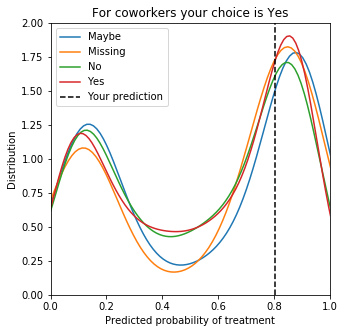

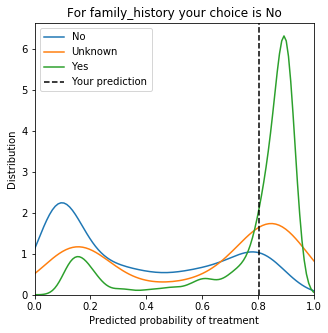

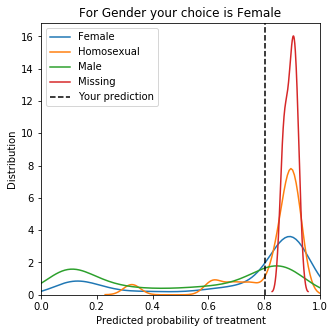

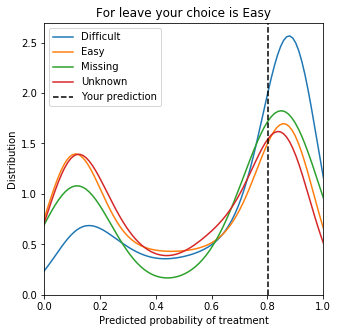

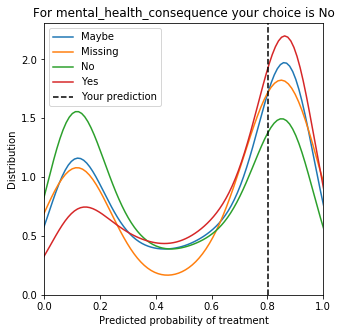

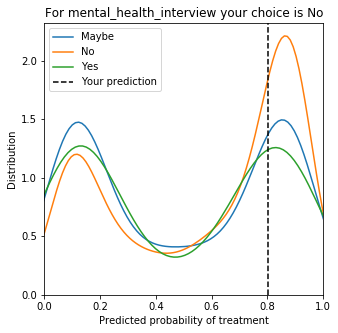

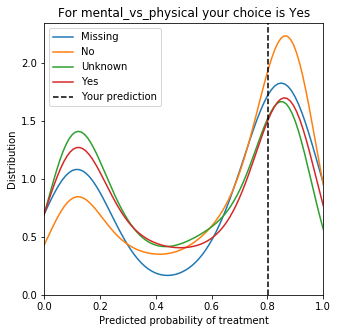

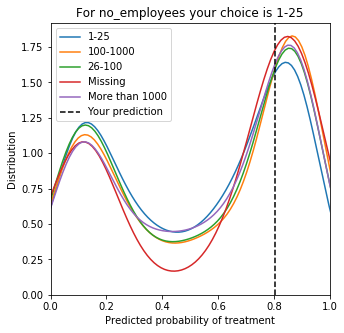

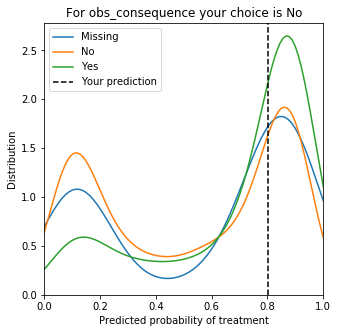

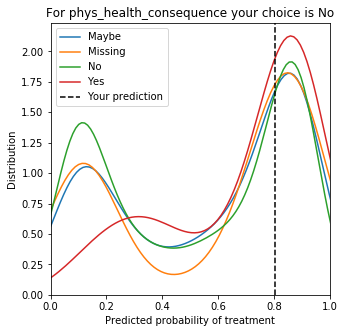

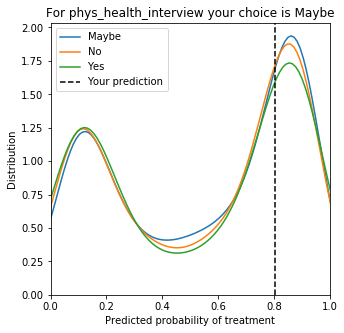

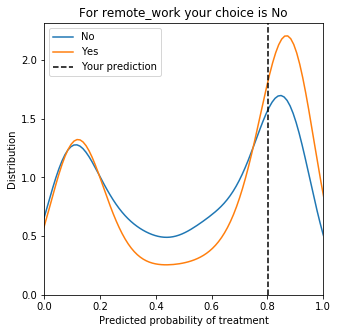

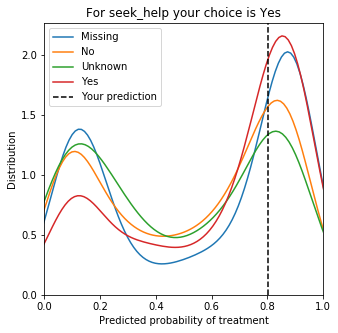

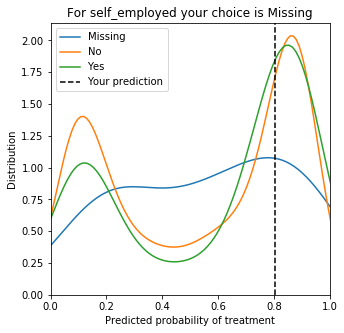

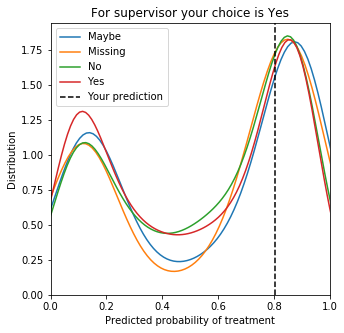

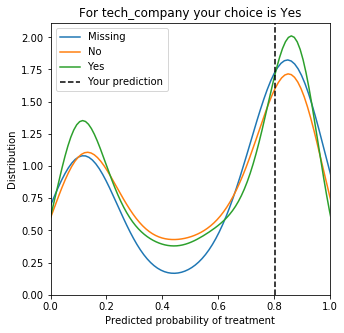

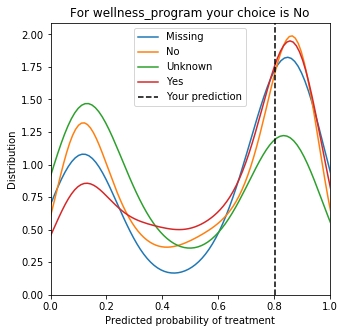

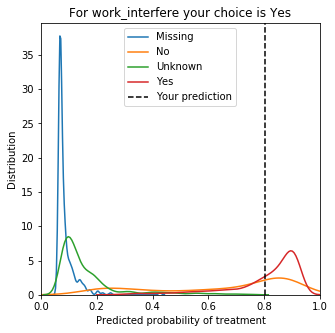

In [11]:
data = pickle.load(open('Data/data.dat','rb'))[0]
for feature in [feature for feature in new_data_raw.columns if 'prediction' not in feature]:
    if data[feature].dtypes in ['int','int32','int64','float','float32','float64']:
        feature_values = pd.qcut(data[feature],q=5)
    else:
        feature_values = data[feature]
    fig = plt.figure(figsize=(5,5))
    for level in feature_values.cat.categories:
        fig = sns.kdeplot(data.loc[feature_values==level,'prediction_metalearner'],label=level)
    plt.axvline(x=new_data_raw.loc[0,'prediction_metalearner'],color='black',linestyle='--',label='Your prediction')
    plt.title('For '+feature+' your choice is '+str(new_data_raw.loc[0,feature]))
    plt.xlim(0,1)
    plt.xlabel('Predicted probability of treatment')
    plt.ylabel('Distribution')
    plt.legend()
    plt.show()

#### Marginal effects of each feature values

Let's see how changing the values of the features affects the predicted probability of treatment for the new instance.

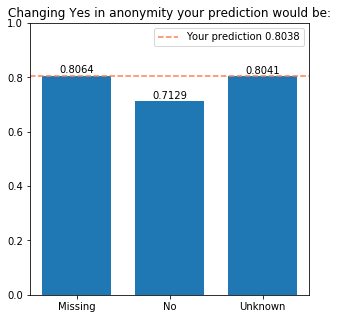

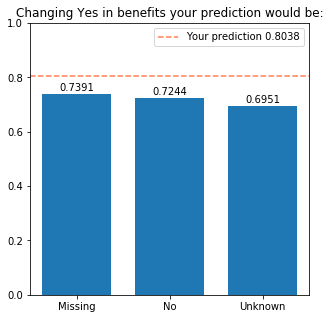

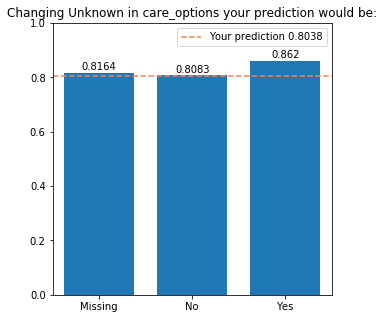

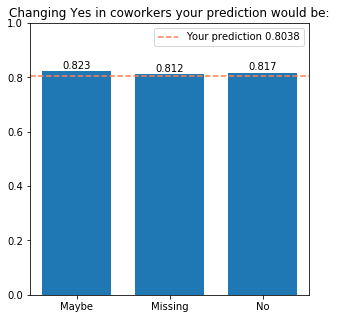

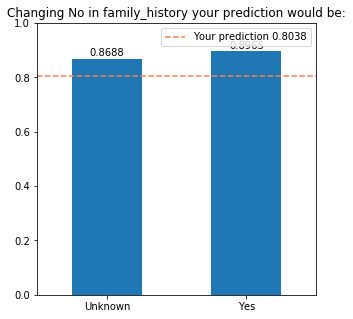

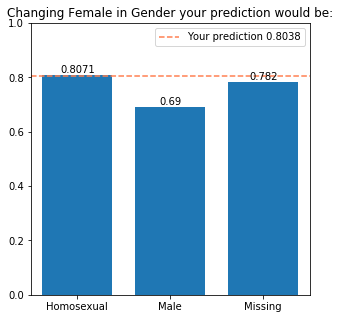

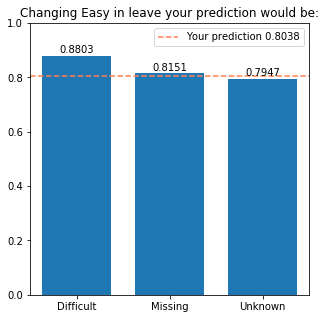

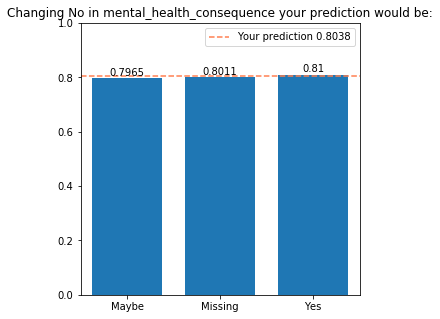

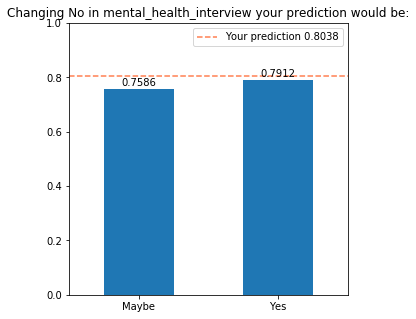

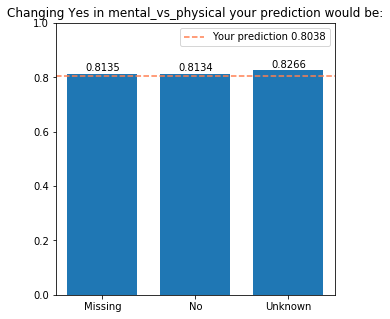

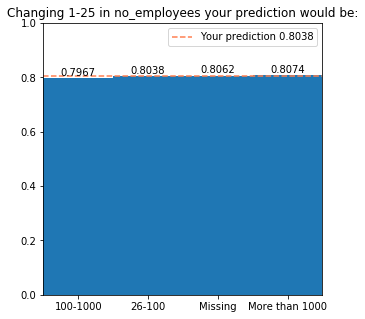

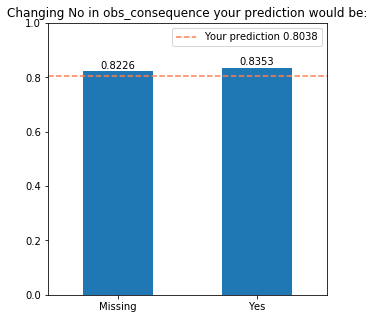

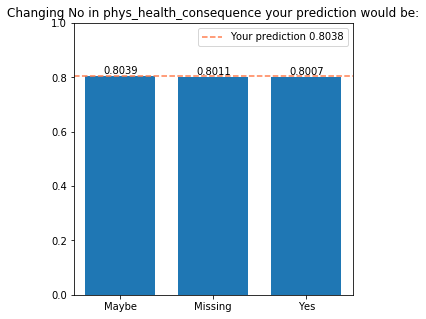

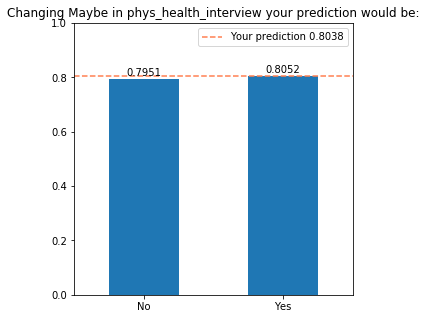

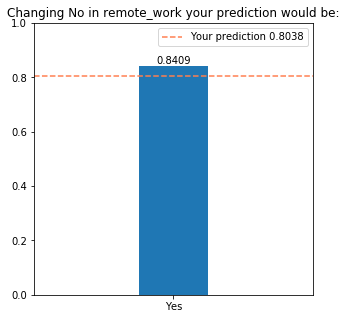

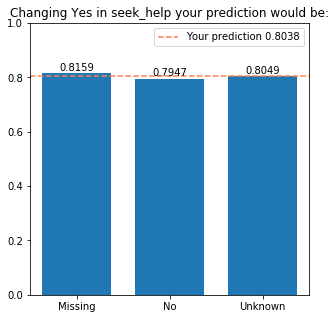

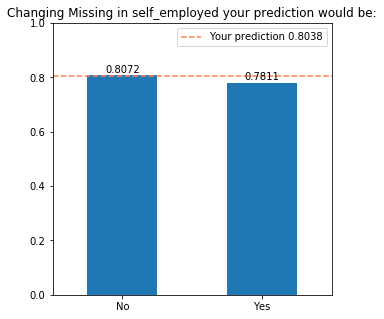

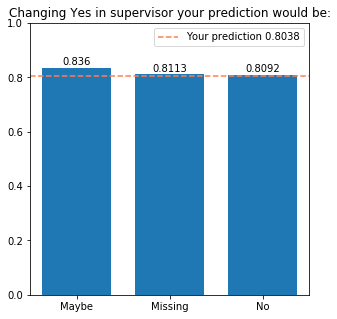

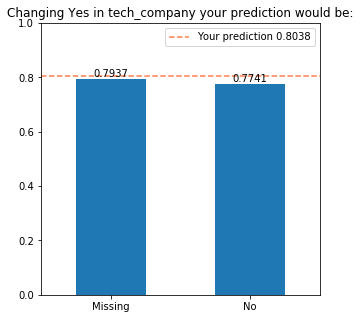

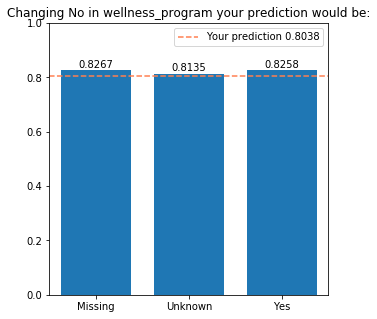

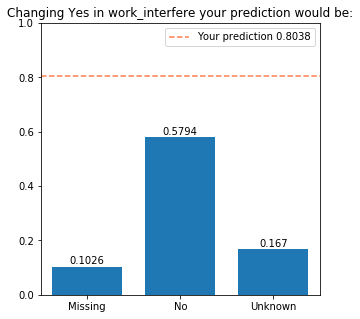

In [12]:
feature_importance = {}
for feature in [feature for feature in new_data_raw.columns if 'prediction' not in feature and new_data_raw[feature].dtypes not in ['int','int32','int64','float','float32','float64']]:
    levels = []
    predictions_metalearner = []
    for level in data[feature].cat.categories:
        if level!=new_data_raw.loc[0,feature]:
            # Change new instance feature value or level
            new_data_change = new_data.copy()
            new_data_raw_change = new_data_raw.copy()
            new_data_change[feature+'_'+str(new_data_raw.loc[0,feature])] = 0
            new_data_change[feature+'_'+str(level)] = 1
            # 1st stacking layer predictions
            for model in ['LR','RF','KNN','ET','XGB','LGBM','DT','AB']:
                models[model] = pickle.load(open('Data/model_layer1_'+model+'.dat','rb'))
                new_data_raw_change['prediction_'+model] = models[model].predict_proba(new_data_change)[:,1]
            # 2nd stacking layer prediction
            columns_predictions = ['prediction_'+model for model in models.keys()]
            new_data_raw_change['prediction_metalearner'] = metalearner.predict_proba(new_data_raw_change[columns_predictions])[:,1]
            # Save feature value or level and its metalearner prediction
            levels.append(level)
            predictions_metalearner.append(new_data_raw_change['prediction_metalearner'][0])
    # Plot metalearner predictions for each feature value or level
    fig = plt.figure(figsize=(5,5))
    plt.bar(levels,predictions_metalearner,width=0.25*len(levels))
    plt.axhline(y=prediction_2nd_stacking_layer,color='coral',linestyle='--',label='Your prediction '+str(round(prediction_2nd_stacking_layer,4)))
    plt.ylim(0,1)
    plt.xlim(-0.5,len(levels)-0.5)
    for index,level in enumerate(levels):
        plt.text(level,predictions_metalearner[index]+0.01,round(predictions_metalearner[index],4),ha='center')
    plt.title('Changing '+str(new_data_raw[feature][0])+' in '+str(feature)+' your prediction would be:')
    plt.legend()
    plt.show()
    # Compute the features importance (standard deviation of the predictions of all feature values)
    predictions_metalearner.append(prediction_2nd_stacking_layer)
    feature_importance[feature] = np.std(predictions_metalearner)

#### Feature importance

For studying the feature importance (at new instance level) we will use, feature by feature, the standard deviation of the new instance predictions (in metalearner or 2nd stacking layer model) after changing its feature value for all possible feature values. The higher standard deviation the more importance because it means that changing the feature values affect more to the predictions.

*Note*: It is computed in the last chunk of features importance.

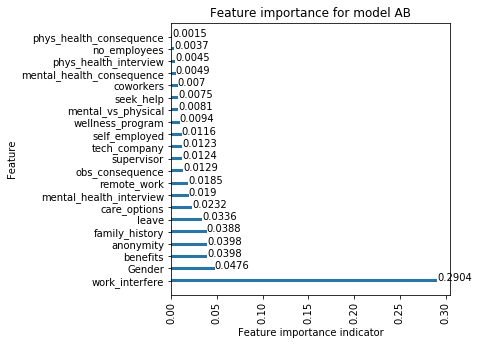

In [13]:
feature_importance = pd.DataFrame.from_dict(feature_importance,orient='index',columns=['Importance'])
feature_importance = feature_importance.iloc[np.argsort(-feature_importance['Importance']),:]
# Plot the feature importance
fig = plt.figure(figsize=(5,5))
plt.barh(feature_importance.index,feature_importance['Importance'],height=0.25)
for feature in feature_importance.index:
    plt.text(feature_importance.loc[feature,'Importance']+0.0001,feature,round(feature_importance.loc[feature,'Importance'],4)) 
plt.xticks(rotation='vertical')
plt.title('Feature importance for model '+str(model))
plt.ylabel('Feature')
plt.xlabel('Feature importance indicator')
plt.show()    